# ADVANCED TEXT MINING
- 본 자료는 텍스트 마이닝을 활용한 연구 및 강의를 위한 목적으로 제작되었습니다.
- 본 자료를 강의 목적으로 활용하고자 하시는 경우 꼭 아래 메일주소로 연락주세요.
- 본 자료에 대한 허가되지 않은 배포를 금지합니다.
- 강의, 저작권, 출판, 특허, 공동저자에 관련해서는 문의 바랍니다.
- **Contact : ADMIN(admin@teanaps.com)**

---

In [1]:
# 텍스트 분석을 위한 TEANAPS 패키지를 설치합니다.
# TEANAPS는 Google Colaboratory/Linux 환경에 최적화되어 있습니다.
# Windows 환경에서 일부 기능에 제한이 있을 수 있습니다.

In [2]:
# TEANAPS (https://github.com/fingeredman/teanaps)
#!git clone https://github.com/fingeredman/teanaps.git

In [3]:
#!ls

In [4]:
#!python "teanaps/teanaps_setup.py"

## WEEK 06-1. 단어빈도와 TF-IDF 계산하기
- Python으로 문서에서 단어를 추출하고 빈도와 TF-IDF를 계산하는 방법에 대해 다룹니다.

---

### 1. 단어빈도와 TF-IDF 계산하기

---

In [5]:
# TEANAPS 형태소 분석기를 불러옵니다.
from teanaps.nlp import MorphologicalAnalyzer
from teanaps.nlp import Processing

processing = Processing()
ma = MorphologicalAnalyzer()
ma.set_tagger("mecab")

tokenized_sentence_list = []
PATH = "data/article_sample.txt"
POS_LIST = ["NNG", "NNP"]

f = open(PATH, encoding="utf-8")

for line in f:
    line = line.strip()
    col = line.split("\t") # [label, souce, datetime, title, content]
    label = col[0]
    source = col[1]
    datetime = col[2]
    title = col[3]
    content = col[4]
    tagged_word_list = ma.parse(content)
    tokenized_sentence = processing.get_plain_text(tagged_word_list, pos_list=POS_LIST, tag=False)
    tokenized_sentence_list.append(tokenized_sentence)

f.close()

tokenized_sentence_list[:3]

['금융 硏 비트코인 쇠락 내재 결함 보고서 지디 넷 코리아 손 예술 기자 대표 암호 화폐 비트코인 가격 급 변동 일부 암호 화폐 옹호 비트코인 결함 해소 국면 예측 결함 전제 국내외 정부 감독 당국 선제 시각 규제 환경 정비 주장 한국 금융 연구원 비트코인 쇠락 내재 결함 보고서 암호 화폐 옹호 입장 제시 결함 발표 암호 화폐 옹호 암호 화폐 부가 가치 사업 모델 등장 가능 집중 인물 통칭 비트코인 결함 우선 해소 비트코인 재화 용역 구입 사용 시장 미국 비트코인 시장 조사 기관 사토시 캐피탈 리서치 기준 비트코인 사용 거래 결제 액 중국 알리 페이 위 챗 페이 거래 결제 액 감안 시장 비트코인 거래 건수 급증 블록 용량 제한 채굴 통 결제 처리 지연 이용자 거래 완료 부담 수수료 문제 비트코인 기반 기술 블록체인 구성 블록 용량 초당 평균 거래 처리 건수 블록 형성 반면 비자 경우 초당 거래 처리 건수 거래소 해킹 사기 거래 노출 점 캐나다 암호 화폐 거래소 쿼드리 대표 이사 설립자 사망 거액 고객 암호 화폐 분시 파산 보호 신청 파산 관재인 비밀 관리 설립자 사망 이전 간 핫 월 렛 고객 암호 화폐 발표 월 렛 인터넷 연결 암호 화폐 전자지갑 결함 비트코인 이용 오프라인 결제 나라 디지털 화폐 실험 시도 상태 암호 화폐 비트코인 법정 통화 보완 지급 결제 가치 저장 수단 역할 가늠 내재 결함 대처 국내외 정부 감독 당국 암호 화폐 시각 규제 환경 정비 필요 보고서 의견 옹호 지적 결함 일부 금융 소비자 투자자 보호 문제 직결 상황 한국 금융 연구원 암호 화폐 수용 검토 정부 감독 당국 소비자 보호 강화 금융 시장 안정 확보 관점 시장 참가자 정보 공시 강화 결제 계좌 전자지갑 제공 거래소 금융 사 자본금 유동 규제 부과 밖 자금 세탁 차단 집중 검토 필요 서술 한편 비트코인 중순 육박 올해 기간 동안 비트코인 시가총액 감소 손 예술 기자',
 '비트코인 상반 평가 김산하 기자 니얼 퍼거슨 하버드대 교수 왼쪽 워렌 버핏 버크셔 해서웨이 회장 오른쪽 사진 트

In [6]:
from teanaps.text_analysis import TfidfCalculator

tfidf = TfidfCalculator()
tfidf.calculation_tfidf(tokenized_sentence_list)

In [7]:
tfidf.get_tf_matrix()

가감  가게  가격  가격대  가계  가까이  가늠  가능  가량  가명  가산  가상  가세  가속  가요  가운데  가을  \
0    0   0   1    0   0    0   1   1   0   0   0   0   0   0   0    0   0   
1    0   0   1    0   0    0   0   0   0   0   0   1   0   0   0    0   0   
2    0   0   0    0   0    0   0   0   0   0   0   1   0   0   0    0   0   
3    0   0   7    0   0    0   0   1   0   2   0   0   0   0   0    0   0   
4    0   0   0    0   0    0   0   0   0   0   0   1   0   0   0    0   0   
..  ..  ..  ..  ...  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..   
95   0   0   0    0   0    0   0   1   0   0   0   0   0   0   0    0   0   
96   0   0   0    0   0    0   0   4   0   0   0   0   0   0   0    0   0   
97   0   0   0    0   0    0   0   1   0   0   0   0   0   0   0    1   0   
98   0   0   0    0   0    0   0   1   0   0   0   0   0   0   0    0   0   
99   0   0   0    0   0    0   0   0   0   0   0   0   0   0   0    0   0   

    가이드  가입  가정  가족  가중  가중치  가짜  가치  가칭  가프  각광  각국  각본  각자  각종  각지  각축전  간과  \
0     0   0   0   0   0    0   0   2   0   0   0   0   0   0   0   0    0   0   
1     0   0   0   0   0    0   0   1   0   0   0   0   0   0   0   0    0   0   
2     0   0   0   0   0    0   0   2   0   0   0   0   0   0   0   0    0   0   
3     0   0   0   0   0    0   0   3   0   0   0   0   0   0   0   0    0   0   
4     0   0   0   0   0    0   0   4   0   0   0   0   0   0   0   0    0   0   
..  ...  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..   
95    0   0   0   0   0    0   0   0   0   0   0   0   0   0   2   0    0   0   
96    0   0   0   0   0    0   0   1   0   0   0   0   0   0   0   0    0   0   
97    0   0   0   0   0    0   0   0   0   0   0   0   0   0   0   0    0   0   
98    0   0   0   0   0    0   0   1   0   0   0   0   0   0   0   0    0   0   
99    0   0   0   0   0    0   0   1   0   0   0   0   0   0   0   0    0   0   

    간부  간섭  간접  간주  간판  갈구  갈등  갈라파고스  갈무리  감당  감독  감독원  감면  감사  감소  감수  감시  \
0    0   0   0   0   0   0   0      0    0   0   3    0   0   0   1   0   0   
1    0   0   0   0   0   0   0      0    0   0   0    0   0   0   0   0   0   
2    0   0   0   0   0   0   0      0    0   0   0    0   0   0   0   0   0   
3    0   0   0   0   0   0   0      0    0   0   0    0   0   0   0   0   0   
4    0   0   0   0   0   0   0      0    0   0   0    0   0   0   0   0   0   
..  ..  ..  ..  ..  ..  ..  ..    ...  ...  ..  ..  ...  ..  ..  ..  ..  ..   
95   0   0   0   0   0   0   0      0    0   0   0    0   0   0   0   0   0   
96   0   0   0   0   0   0   0      0    0   0   2    0   0   0   0   0   0   
97   0   0   0   0   0   0   0      0    0   0   0    1   0   0   0   0   0   
98   0   0   0   0   0   0   0      0    0   0   0    0   0   0   0   0   0   
99   0   0   0   0   0   0   0      0    0   0   0    0   0   0   0   0   0   

    감안  감염  갑론을박  강세  강연  강자  강점  강조  강화  개개인  개념  개당  개도국  개미  개발  개발자  개별  \
0    1   0     0   0   0   0   0   0   2    0   0   0    0   0   0    0   0   
1    0   0     0   0   0   0   0   0   0    0   0   0    0   0   0    0   0   
2    0   0     0   0   0   0   0   1   0    0   0   0    0   0   0    7   0   
3    0   0     0   0   0   0   0   1   1    0   0   0    0   0   1    1   0   
4    0   0     0   0   1   0   0   0   0    0   0   0    0   0   1    0   0   
..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ...  ..  ..  ...  ..   
95   0   0     0   0   0   0   0   0   0    0   0   0    0   0   0    0   0   
96   0   0     0   0   0   0   0   0   0    0   0   0    0   0   0    0   0   
97   0   0     0   0   0   0   0   0   0    0   0   0    0   0   1    0   0   
98   0   0     0   0   0   0   0   0   0    0   0   0    0   0   0    0   0   
99   0   0     0   0   0   0   0   0   0    0   0   0    0   0   0    0   0   

    개선  개설  개시  개인  개입  개장  개정  개정안  개척  개최  개편  개화  객체  갤럭시  갱신  거대  거래  거래량  \
0    0   0   0   0   0   0   0    0   0   0   0   0   0    0   0   0   7    0   
1    0   0   0   0   0   0   0    0   0   1   

In [8]:
tfidf.get_tfidf_matrix()

가감   가게        가격  가격대   가계  가까이        가늠        가능   가량       가명   가산  \
0   0.0  0.0  0.025960  0.0  0.0  0.0  0.053322  0.019354  0.0  0.00000  0.0   
1   0.0  0.0  0.032621  0.0  0.0  0.0  0.000000  0.000000  0.0  0.00000  0.0   
2   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.00000  0.0   
3   0.0  0.0  0.106459  0.0  0.0  0.0  0.000000  0.011338  0.0  0.05733  0.0   
4   0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.00000  0.0   
..  ...  ...       ...  ...  ...  ...       ...       ...  ...      ...  ...   
95  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.032686  0.0  0.00000  0.0   
96  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.033972  0.0  0.00000  0.0   
97  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.020561  0.0  0.00000  0.0   
98  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.022649  0.0  0.00000  0.0   
99  0.0  0.0  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.0  0.00000  0.0   

          가상   가세   가속   가요       가운데   가을  가이드   가입   가정   가족   가중  가중치   가짜  \
0   0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.043798  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.025618  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4   0.046147  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
..       ...  ...  ...  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...   
95  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
96  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
97  0.000000  0.0  0.0  0.0  0.029051  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
98  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
99  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

          가치   가칭   가프   각광   각국   각본   각자        각종   각지  각축전   간과   간부   간섭  \
0   0.051920  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
1   0.032621  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
2   0.038162  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
3   0.045625  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
4   0.137483  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
..       ...  ...  ...  ...  ...  ...  ...       ...  ...  ...  ...  ...  ...   
95  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.108902  0.0  0.0  0.0  0.0  0.0   
96  0.011392  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
97  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
98  0.030380  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   
99  0.034382  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0   

     간접   간주   간판   갈구   갈등  갈라파고스  갈무리   감당        감독       감독원   감면   감사  \
0   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.096724  0.000000  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
..  ...  ...  ...  ...  ...    ...  ...  ...       ...       ...  ...  ...   
95  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
96  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.028297  0.000000  0.0  0.0   
97  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.028539  0.0  0.0   
98  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   
99  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0  0.000000  0.000000  0.0  0.0   

          감소   감수   감시        감안   감염  갑론을박   강세        강연   강자   강점  \
0   0.043396  0.0  0.0  0.038304  0.0   0.0  0.0  0.000000  0.0  0.0   
1   0.000000  0.0

In [9]:
tfidf.get_result()["금융"]

{'tf': 924, 'tfidf': 11.738180925849433}

In [10]:
tfidf.get_tf_dict()["금융"]

924

In [11]:
tfidf.get_tf_list()[:20]

[['금융', 924],
 ['금리', 804],
 ['비트코인', 540],
 ['부동산', 519],
 ['대출', 507],
 ['은행', 413],
 ['기준', 273],
 ['화폐', 221],
 ['코픽스', 206],
 ['시장', 191],
 ['암호', 181],
 ['투자', 167],
 ['자산', 165],
 ['당국', 149],
 ['그림자', 136],
 ['기자', 133],
 ['신탁', 132],
 ['상품', 110],
 ['거래', 108],
 ['관련', 107]]

In [12]:
tfidf.get_tfidf_dict()

{'금리': 17.199621495443807,
 '부동산': 14.711674578350465,
 '금융': 11.738180925849433,
 '비트코인': 10.277484885357413,
 '대출': 8.417348255220888,
 '그림자': 6.150038126812332,
 '은행': 5.790850239331065,
 '코픽스': 5.551757084045101,
 '기준': 5.0313636841490625,
 '화폐': 4.87615035331772,
 '암호': 4.277857067040163,
 '신탁': 3.872724294775536,
 '교육': 3.5965733137403815,
 '투자': 3.5704715372687144,
 '시장': 3.3374162338859836,
 '자산': 3.2051398900459716,
 '리스크': 3.0250823731493552,
 '규모': 2.841986288083643,
 '최고': 2.7906285796283496,
 '관련': 2.751094985023331,
 '평균': 2.6944521230373506,
 '당국': 2.654324830820017,
 '거래': 2.6163026457259293,
 '국내': 2.572418896479968,
 '이하': 2.5255336203773027,
 '잔액': 2.5105546734568245,
 '산정': 2.483592751068331,
 '인하': 2.4827982932379995,
 '상품': 2.4274446829646026,
 '신용': 2.183366943466131,
 '중금리': 2.1601968381621495,
 '가격': 2.14163053624956,
 '미만': 2.1029710373973463,
 '가산': 2.057514234899871,
 '자금': 2.0014578024040794,
 '경제': 1.917217260777848,
 '코인': 1.9163353185655392,
 '기업': 1.901

In [13]:
tfidf.get_tfidf_list()[:20]

[['금리', 17.199621495443807],
 ['부동산', 14.711674578350465],
 ['금융', 11.738180925849433],
 ['비트코인', 10.277484885357413],
 ['대출', 8.417348255220888],
 ['그림자', 6.150038126812332],
 ['은행', 5.790850239331065],
 ['코픽스', 5.551757084045101],
 ['기준', 5.0313636841490625],
 ['화폐', 4.87615035331772],
 ['암호', 4.277857067040163],
 ['신탁', 3.872724294775536],
 ['교육', 3.5965733137403815],
 ['투자', 3.5704715372687144],
 ['시장', 3.3374162338859836],
 ['자산', 3.2051398900459716],
 ['리스크', 3.0250823731493552],
 ['규모', 2.841986288083643],
 ['최고', 2.7906285796283496],
 ['관련', 2.751094985023331]]

In [14]:
tfidf.get_word_list()[:20]

['금리',
 '부동산',
 '금융',
 '비트코인',
 '대출',
 '그림자',
 '은행',
 '코픽스',
 '기준',
 '화폐',
 '암호',
 '신탁',
 '교육',
 '투자',
 '시장',
 '자산',
 '리스크',
 '규모',
 '최고',
 '관련']

In [15]:
tfidf.draw_tfidf(100)

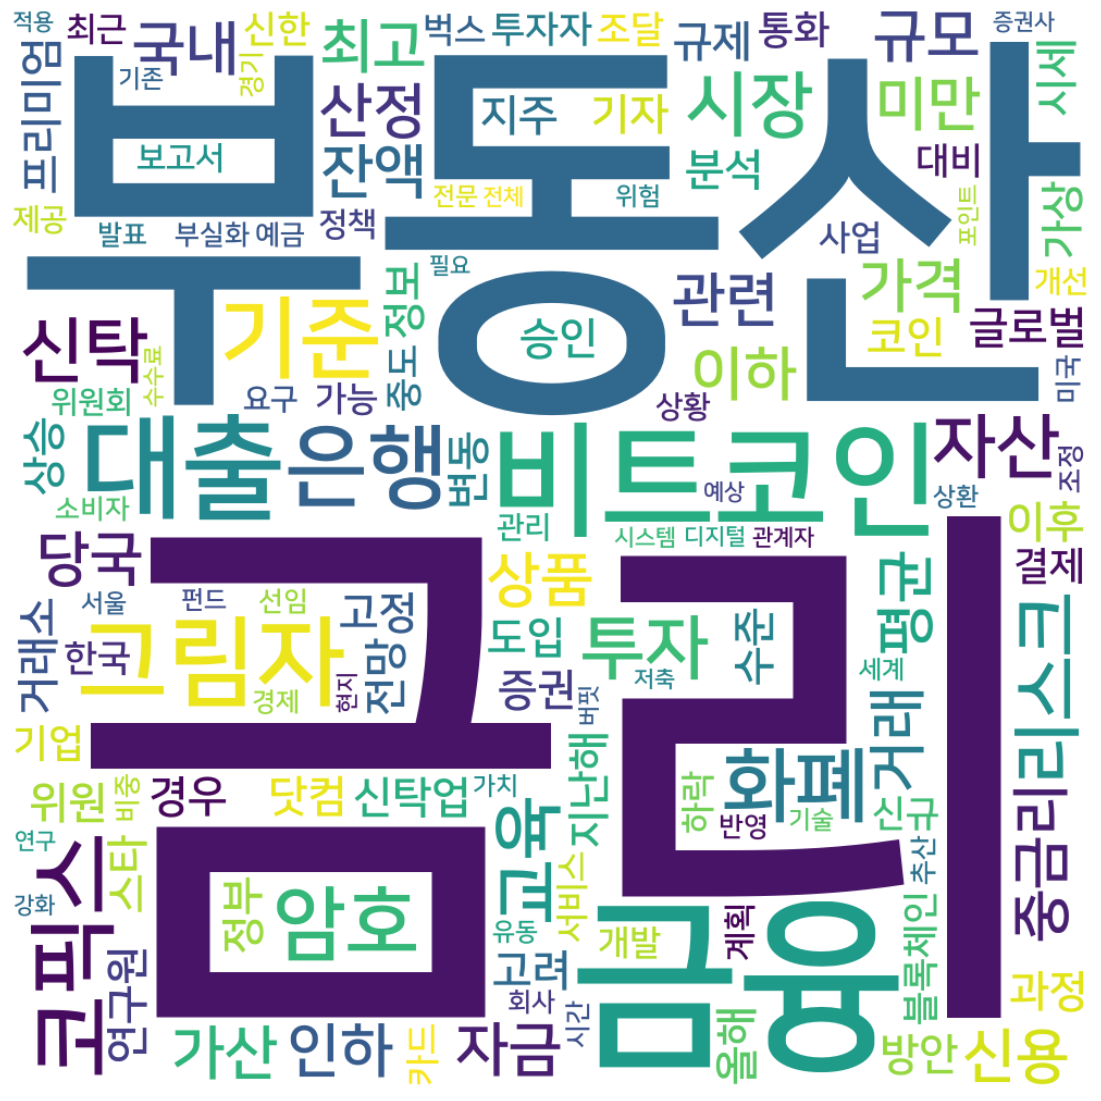

In [16]:
count_dict = tfidf.get_tfidf_dict()
tfidf.get_wordcloud(count_dict)

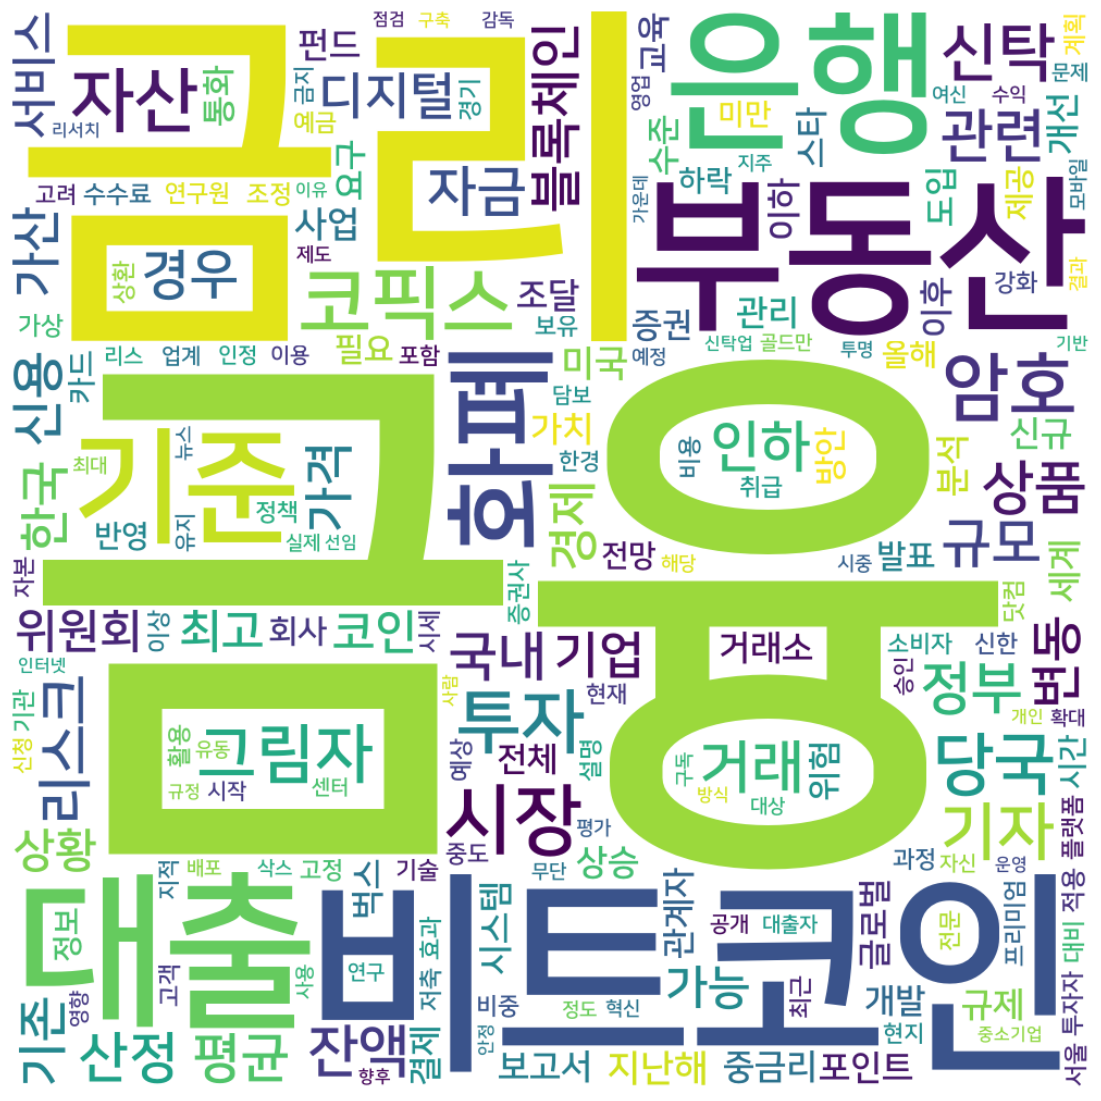

In [17]:
count_dict = tfidf.get_tf_dict()
tfidf.get_wordcloud(count_dict)

### 2. 불용어 처리하기

---

In [18]:
from teanaps.nlp import Processing
pro = Processing()

In [19]:
result = pro.get_stopword()
print(result[-10:])

['생각', '소주', '감사', '오늘', '생각', '소주', '감사', '오늘', '생각', '소주']


In [20]:
pro.add_stopword("가")

result = pro.get_stopword()
print(result[-10:])

['소주', '감사', '오늘', '생각', '소주', '감사', '오늘', '생각', '소주', '가']


In [21]:
pro.add_stopword(["으로", "로서", "때문에"])

result = pro.get_stopword()
print(result[-10:])

['생각', '소주', '감사', '오늘', '생각', '소주', '가', '으로', '로서', '때문에']


In [22]:
pro.remove_stopword("때문에")

result = pro.get_stopword()
print(result[-10:])

['오늘', '생각', '소주', '감사', '오늘', '생각', '소주', '가', '으로', '로서']


In [23]:
pro.remove_stopword(["은", "는", "이", "가"])

result = pro.get_stopword()
print(result[-10:])

['감사', '오늘', '생각', '소주', '감사', '오늘', '생각', '소주', '으로', '로서']


In [24]:
pro.clear_stopword()

result = pro.get_stopword()
print(result[-10:])

[]


In [25]:
pro.set_org_stopword()

result = pro.get_stopword()
print(result[-10:])

['ㅗ', 'ㅛ', 'ㅜ', 'ㅠ', 'ㅡ', 'ㅣ', '', '은', '는', '이']


In [26]:
result = pro.is_stopword("은")
print(result)

True


In [27]:
result = pro.is_stopword("없는단어")
print(result)

False


In [28]:
tfidf.calculation_tfidf(tokenized_sentence_list)
tfidf.get_tf_list()[:20]

[['금융', 924],
 ['금리', 804],
 ['비트코인', 540],
 ['부동산', 519],
 ['대출', 507],
 ['은행', 413],
 ['기준', 273],
 ['화폐', 221],
 ['코픽스', 206],
 ['시장', 191],
 ['암호', 181],
 ['투자', 167],
 ['자산', 165],
 ['당국', 149],
 ['그림자', 136],
 ['기자', 133],
 ['신탁', 132],
 ['상품', 110],
 ['거래', 108],
 ['관련', 107]]

In [29]:
pro.add_stopword("기자")
pro.add_stopword("관련")
pro.add_stopword("비트코인")

In [30]:
tfidf.calculation_tfidf(tokenized_sentence_list)
tfidf.get_tf_list()[:20]

[['금융', 924],
 ['금리', 804],
 ['부동산', 519],
 ['대출', 507],
 ['은행', 413],
 ['기준', 273],
 ['화폐', 221],
 ['코픽스', 206],
 ['시장', 191],
 ['암호', 181],
 ['투자', 167],
 ['자산', 165],
 ['당국', 149],
 ['그림자', 136],
 ['신탁', 132],
 ['상품', 110],
 ['거래', 108],
 ['잔액', 101],
 ['정부', 101],
 ['리스크', 97]]